In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import copy

In [2]:
x_train = np.array([30, 50, 60, 80, 100])
y_train = np.array([70000, 100000, 120000, 150000, 200000])

In [3]:
for i, j in zip(x_train, y_train):
    print(i, j)

30 70000
50 100000
60 120000
80 150000
100 200000


In [4]:
len(x_train), len(y_train)

(5, 5)

In [5]:
x_train, y_train

(array([ 30,  50,  60,  80, 100]),
 array([ 70000, 100000, 120000, 150000, 200000]))

<function matplotlib.pyplot.show(close=None, block=None)>

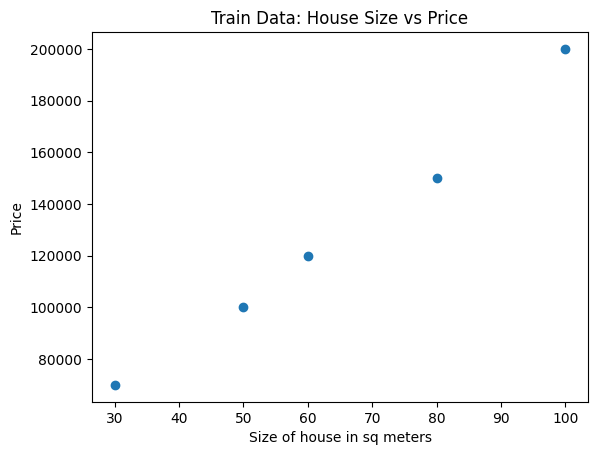

In [6]:
plt.scatter(x_train, y_train)
plt.title("Train Data: House Size vs Price")
plt.xlabel("Size of house in sq meters")
plt.ylabel("Price")
plt.show

In [7]:
x_train.shape

(5,)

In [13]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(0,m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    total_cost = cost / (2 * m)
    return total_cost

In [17]:
def compute_gradients(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(0, m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [18]:
def gradient_descent(x, y, w_in, b_in, alpha, num_inters, cost_function, gradient_function):
    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)
    J_history=[]
    for i in range(0, num_inters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J_history.append(cost_function(x, y, w, b))
        print(f"Iteration: {i} | Cost: {J_history[i]:.4} | dj_dw: {dj_dw:.4} | dj_db: {dj_db:.4} | w: {w:.4} | b: {b:.4}")
    return w, b, J_history

In [19]:
w_init = 0
b_init = 0
iterations = 20
alpha = 3.0e-4
w_final, b_final, J_history = gradient_descent(x=x_train, y=y_train, alpha=alpha, w_in=w_init, b_in=b_init, num_inters=iterations, cost_function=compute_cost, gradient_function=compute_gradients)
print(f"(w,b) found by gradient descent equal to ({w_final:.4}, {b_final:.4})")

Iteration: 0 | Cost: 1.516e+09 | dj_dw: -9.26e+06 | dj_db: -1.28e+05 | w: 2.778e+03 | b: 38.4
Iteration: 1 | Cost: 2.636e+08 | dj_dw: 3.743e+06 | dj_db: 4.983e+04 | w: 1.655e+03 | b: 23.45
Iteration: 2 | Cost: 5.888e+07 | dj_dw: -1.513e+06 | dj_db: -2.206e+04 | w: 2.109e+03 | b: 30.07
Iteration: 3 | Cost: 2.543e+07 | dj_dw: 6.118e+05 | dj_db: 7.003e+03 | w: 1.925e+03 | b: 27.97
Iteration: 4 | Cost: 1.996e+07 | dj_dw: -2.473e+05 | dj_db: -4.746e+03 | w: 2e+03 | b: 29.39
Iteration: 5 | Cost: 1.907e+07 | dj_dw: 1e+05 | dj_db: 3.701 | w: 1.97e+03 | b: 29.39
Iteration: 6 | Cost: 1.892e+07 | dj_dw: -4.04e+04 | dj_db: -1.916e+03 | w: 1.982e+03 | b: 29.97
Iteration: 7 | Cost: 1.889e+07 | dj_dw: 1.636e+04 | dj_db: -1.14e+03 | w: 1.977e+03 | b: 30.31
Iteration: 8 | Cost: 1.889e+07 | dj_dw: -6.587e+03 | dj_db: -1.454e+03 | w: 1.979e+03 | b: 30.74
Iteration: 9 | Cost: 1.889e+07 | dj_dw: 2.689e+03 | dj_db: -1.327e+03 | w: 1.978e+03 | b: 31.14
Iteration: 10 | Cost: 1.889e+07 | dj_dw: -1.061e+03 | dj

In [20]:
J_history

[1516077310.0799985,
 263575550.75001973,
 58880942.8086731,
 25427599.256992,
 19959911.864977896,
 19065870.658561178,
 18919292.371351305,
 18894870.658259764,
 18890412.812352978,
 18889217.66078383,
 18888555.760492597,
 18887981.043438334,
 18887420.609509654,
 18886862.544767972,
 18886304.90213696,
 18885747.36340665,
 18885189.876569975,
 18884632.433124974,
 18884075.031679444,
 18883517.672003355]

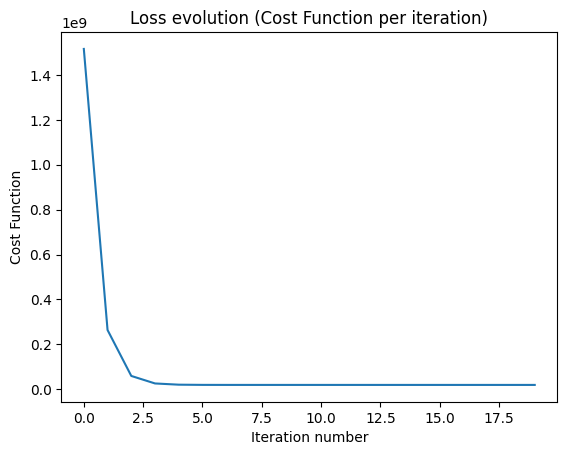

In [21]:
plt.plot(J_history)
plt.title("Loss evolution (Cost Function per iteration)")
plt.xlabel("Iteration number")
plt.ylabel("Cost Function")
plt.show()

In [22]:
def r2_score(y, y_):
    num = np.sum((y - y_)**2)
    denom = np.sum((y - y.mean())**2)
    score = 1 - num / denom
    return score

In [23]:
y_ = [w_final * i + b_final for i in x_train]

In [24]:
y_

[59379.87227105263,
 98942.9642045718,
 118724.51017133139,
 158287.60210485058,
 197850.69403836975]

In [25]:
r2_score(y_train, y_)

0.9808871278623448

In [26]:
x_train = np.array([30, 50, 60, 80, 100])
y_train = np.array([70000, 100000, 120000, 150000, 200000])

In [27]:
size_of_house = 20
print(f"A house with the size(sq. m) of {size_of_house} has a price of: {w_final * size_of_house + b_final} dollars")
size_of_house = 30
print(f"A house with the size(sq m) of {size_of_house} has a price of: {w_final * size_of_house + b_final} dollars")
size_of_house = 50
print(f"A house with the size(sq m) of {size_of_house} has a price of: {w_final * size_of_house + b_final} dollars")
size_of_house = 60
print(f"A house with the size(sq m) of {size_of_house} has a price of: {w_final * size_of_house + b_final} dollars")
size_of_house = 100
print(f"A house with the size(sq m) of {size_of_house} has a price of: {w_final * size_of_house + b_final} dollars")

A house with the size(sq. m) of 20 has a price of: 39598.32630429304 dollars
A house with the size(sq m) of 30 has a price of: 59379.87227105263 dollars
A house with the size(sq m) of 50 has a price of: 98942.9642045718 dollars
A house with the size(sq m) of 60 has a price of: 118724.51017133139 dollars
A house with the size(sq m) of 100 has a price of: 197850.69403836975 dollars


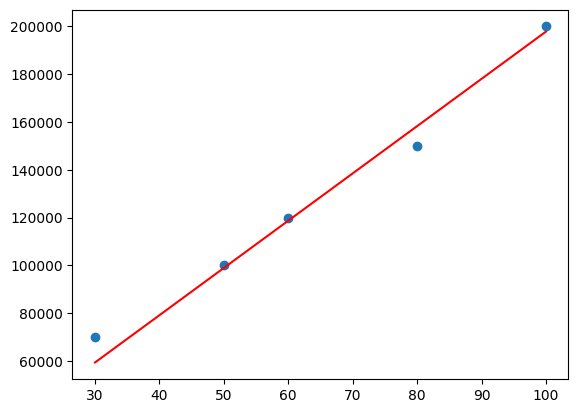

In [30]:
plt.scatter(x_train, y_train)
plt.plot(x_train, w_final * x_train + b_final, c='r')
plt.show()